In [84]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/so-survey-2017/survey_results_schema.csv
/kaggle/input/so-survey-2017/survey_results_public.csv


# Write a Data Science Blog Post

In this project, we will conduct the CRISP-DM process to analyze the stackoverflow survey 2017 dataset. Then, the conclusions of this analysis will be conveyed through a medium blog post to a non-technical audience.

The CRISP-DM (Cross Industry Process for Data Mining) process consists of mutiple stages, each is used when ever it is needed:

1. Business Understanding
2. Data Understanding
3. Prepare Data
4. Data Modeling
5. Evaluate the Results
6. Deploy

# Key Steps for the Project

The project mainly address the following points:

1. Picking a dataset, which is the "so-survey-2017" dataset in this case.

2. Pose at least three questions related to business or real-world applications of how the data could be used.

3. Creating a Jupyter Notebook, using any associated packages you'd like, to:

    Prepare data:

        - Gather necessary data to answer your questions
        - Handle categorical and missing data
        - Provide insight into the methods you chose and why you chose them
    - Analyze, Model, and Visualize
        - Provide a clear connection between your business questions and how the data answers them.

4. Communicating your business insights:

- Create a Github repository to share your code and data wrangling/modeling techniques, with a technical audience in mind
- Create a blog post to share your questions and insights with a non-technical audience

# Questions answered in this notebook:
1. What are the top 5 most used programming languages in 2017?
2. How do programming languages relate to salary and job satisfaction?
3. What are the most common coding platforms in the industry in 2017?

In [109]:
# import libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from collections import Counter
import plotly.express as px
import plotly.graph_objects as go

%matplotlib inline

In [86]:
df_2017 = pd.read_csv('/kaggle/input/so-survey-2017/survey_results_public.csv')

df_2017.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [87]:
#see the schema data

df_schema = pd.read_csv('/kaggle/input/so-survey-2017/survey_results_schema.csv')

df_schema.head()

,Column,Question
0,Respondent,Respondent ID number
1,Professional,Which of the following best describes you?
2,ProgramHobby,Do you program as a hobby or contribute to ope...
3,Country,In which country do you currently live?
4,University,"Are you currently enrolled in a formal, degree..."


In [88]:
def get_question(column_name, schema=df_schema):
    '''
    Get the question of a column
        
    INPUT - schema - pandas dataframe with the schema of the developers survey
            column_name - string - the name of the column you would like to know about
    OUTPUT - 
            desc - string - the Question of the column
    
    '''
    
    question = list(schema[schema['Column']== column_name]['Question'])[0]
    return question

# What are the most used platforms of 2017?

In [89]:
# the questoin of HaveWorkedPlatform

get_question('HaveWorkedPlatform')

'Which of the following platforms have you done extensive development work for over the past year, and which do you want to work on over the next year?'

In [90]:
# split the results, responds by responds

plat_column = df_2017['HaveWorkedPlatform'].dropna().apply(lambda x: x.split("; "))

In [91]:
# combine all the responds into one list

every_responds = []

for row in plat_column:
    every_responds.extend(row)

In [92]:
# create a dataframe with all the platforms and their numbers

plat_count = pd.DataFrame.from_dict(Counter(every_responds), orient='index').reset_index().rename(columns={'index':'platform', 0: 'count'})

# calculate each percentage of each platform used

plat_count["percentage"] = plat_count['count'] / plat_count['count'].sum()

plat_count.head()

,platform,count,percentage
0,iOS,4782,0.070754
1,Amazon Web Services (AWS),8183,0.121075
2,Windows Desktop,11949,0.176797
3,Linux Desktop,9593,0.141938
4,Mac OS,5363,0.079351


Text(0, 0.5, 'percentages')

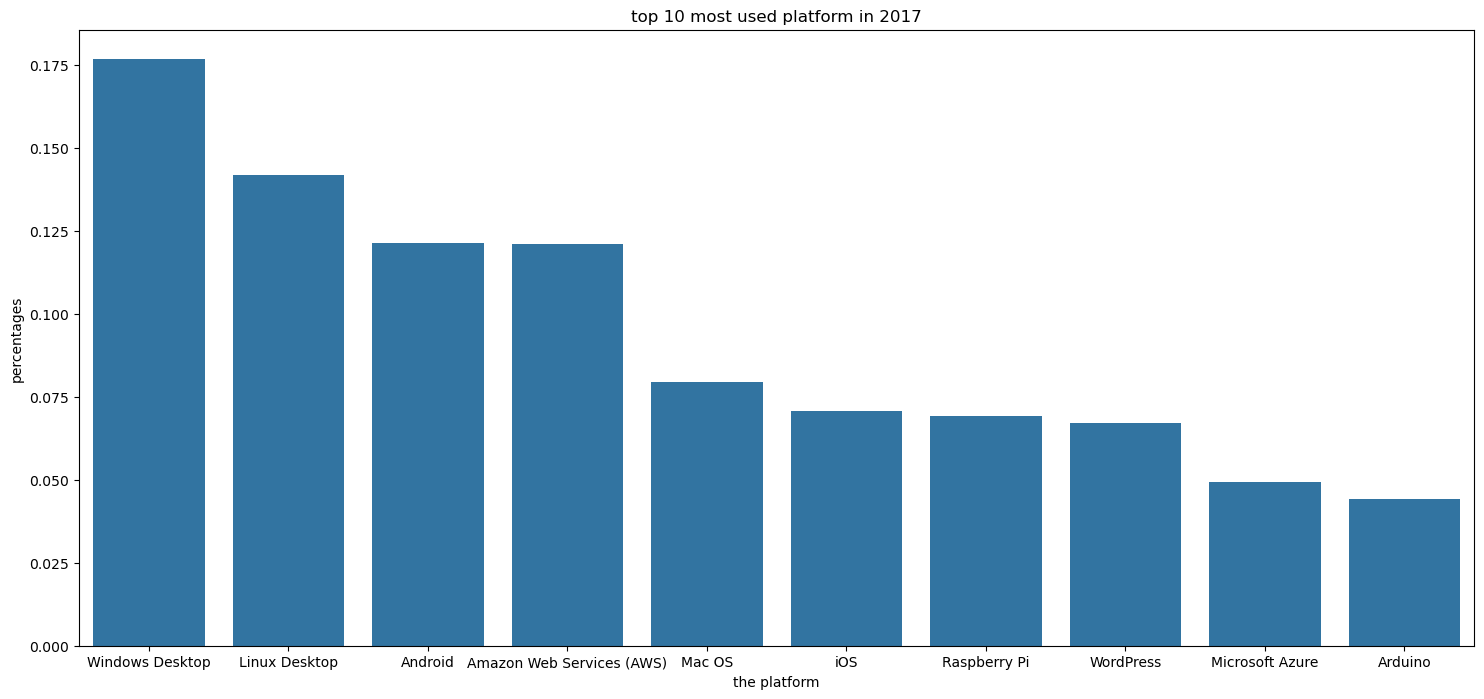

In [93]:
# top 10 most used platforms in 2017 (plot)

plt.figure(figsize=(18,8))
ax = sns.barplot(data=plat_count.sort_values('percentage', ascending=False)[:10], x='platform', y='percentage', color=sns.color_palette()[0])
plt.title("top 10 most used platform in 2017")
plt.xlabel("the platform")
plt.ylabel("percentages")

# what is the most popular developer type?

In [94]:
# what developer type are you?

get_question('DeveloperType')

'Which of the following best describe you?'

In [95]:
# split each respond by the result

dev_column = df_2017['DeveloperType'].dropna().apply(lambda x: x.split("; "))
print(dev_column)

2                                                  [Other]
4        [Mobile developer, Graphics programming, Deskt...
7                                          [Web developer]
8                        [Web developer, Mobile developer]
9        [Mobile developer, Desktop applications develo...
                               ...                        
51384                                      [Web developer]
51386    [Web developer, Mobile developer, Developer wi...
51387    [Web developer, Developer with a statistics or...
51389               [Web developer, Systems administrator]
51390                    [Web developer, Mobile developer]
Name: DeveloperType, Length: 36125, dtype: object


In [96]:
# collect all answers in a list

developer_type_all = []

for row in dev_column:
    developer_type_all.extend(row)

In [97]:
# dataframe:

developer_type = pd.DataFrame.from_dict(Counter(developer_type_all), orient='index').reset_index().rename(columns={'index': 'developer_type', 0:'count'})

developer_type ['percentage'] = developer_type['count'] / developer_type['count'].sum()

developer_type.head()

,developer_type,count,percentage
0,Other,2694,0.034870
1,Mobile developer,8326,0.107767
2,Graphics programming,1731,0.022405
3,Desktop applications developer,10435,0.135065
4,Web developer,26235,0.339572


Text(0, 0.5, 'percentage')

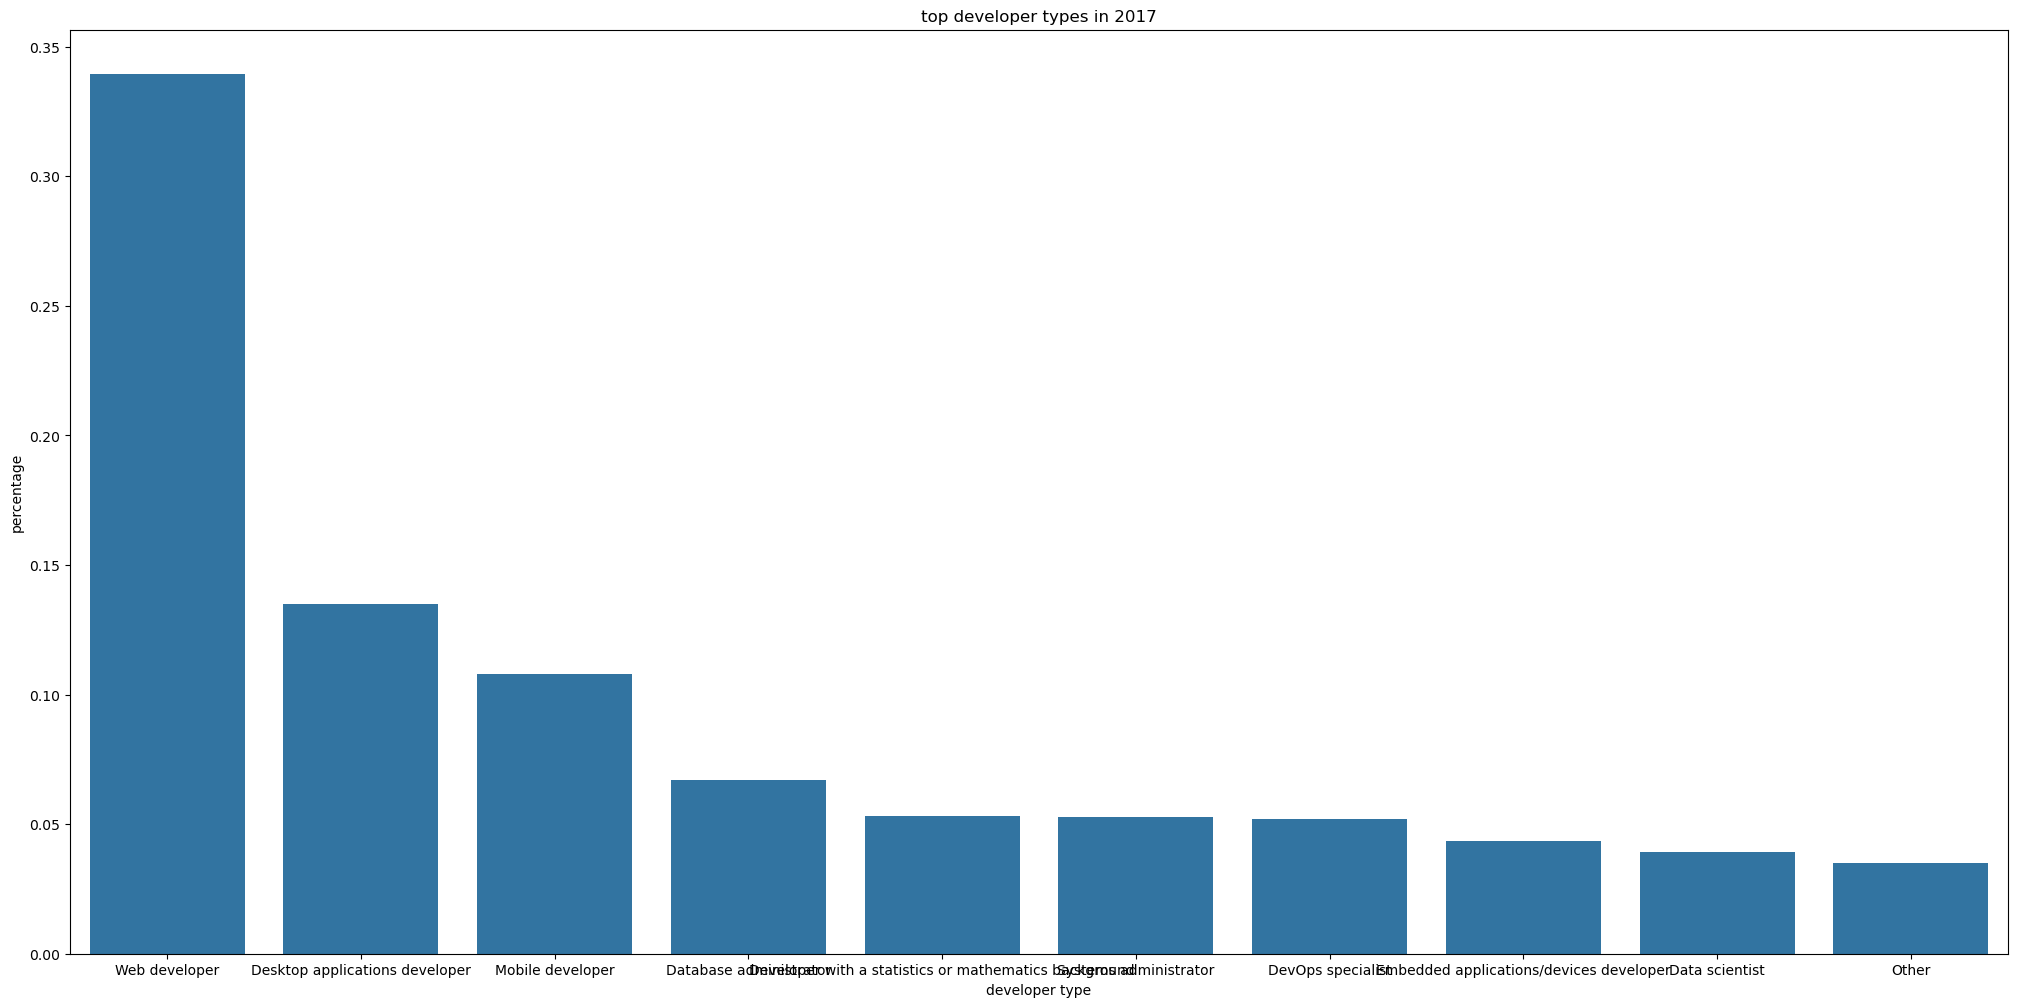

In [98]:
# plot of top developer types in 2017:

plt.figure(figsize=(25,12))
ax2 = sns.barplot(data=developer_type.sort_values('percentage', ascending=False)[:10], x='developer_type', y='percentage', color=sns.color_palette()[0])
plt.title("top developer types in 2017")
plt.xlabel("developer type")
plt.ylabel("percentage")


# Job satisfaction and salary correlate to developer types:

In [99]:
# we only need 'DeveloperType', 'Salary' and 'JobSatisfaction'

jobsat_dev = df_2017[['DeveloperType', 'Salary', 'JobSatisfaction']][:]
jobsat_dev.dropna(inplace=True)
jobsat_dev['DeveloperType'] = jobsat_dev['DeveloperType'].apply(lambda x: x.split("; "))
#print(jobsat_dev)

In [100]:
# calucluate job satisfaction for each dev type
developer_type['Salary'] = 0
developer_type['JobSatisfaction'] = 0

for dev in developer_type['developer_type']:
    developer_type.loc[developer_type.developer_type == dev, "Salary"] = jobsat_dev[jobsat_dev['DeveloperType'].astype(str).str.contains(re.escape(dev))]['Salary'].mean()
    developer_type.loc[developer_type.developer_type == dev, "JobSatisfaction"] = jobsat_dev[jobsat_dev['DeveloperType'].astype(str).str.contains(re.escape(dev))]['JobSatisfaction'].mean()

In [101]:
def normalize_mean(x):
    """
    This function normalizes an array with the mean normalization
    
    INPUT: an array
    OUTPUT: normalized array
    """
    
    return (x - x.mean())/(max(x) - min(x))

In [105]:
# calculate the normalized data of salary and job satifaction
developer_type['salary_scaled'] = normalize_mean(developer_type['Salary'])
developer_type['jobsatisfaction_scaled'] = normalize_mean(developer_type['JobSatisfaction'])

developer_type.head()

,developer_type,count,percentage,Salary,JobSatisfaction,salary_scaled,jobsatisfaction_scaled
0,Other,2694,0.034870,72344.574448,7.173546,0.530843,0.540455
1,Mobile developer,8326,0.107767,50688.448150,7.047159,-0.276575,0.116191
2,Graphics programming,1731,0.022405,53229.597132,7.134855,-0.181832,0.410573
3,Desktop applications developer,10435,0.135065,56325.200771,6.875649,-0.066417,-0.459545
4,Web developer,26235,0.339572,54870.162559,6.953511,-0.120666,-0.198175


In [108]:
# only take the top 5 developer types:

dev_types_sorted5 = developer_type.sort_values('percentage', ascending=False)[:5]
# print(dev_types_sorted5)

In [114]:
# plot normalized job satis and salary from the mean

fig = go.Figure(data=[
    go.Bar(name='Salary', x=dev_types_sorted5['salary_scaled'], y=dev_types_sorted5['developer_type'], marker_color=px.colors.qualitative.T10[0]),
    go.Bar(name='JobSatisfaction', x=dev_types_sorted5['jobsatisfaction_scaled'], y=dev_types_sorted5['developer_type'], marker_color=px.colors.qualitative.T10[2])
])

fig.update_layout(barmode='group', width=700, height=700, title_text="Job Satisfaction and Salary")
fig.update_xaxes(title_text="normalized difference from the mean", tickvals=[-1.00, -0.50, 0.00, 0.50, 1.00], range=(-1,1))
fig.update_yaxes(title_text="developer types")
fig.update_traces(orientation="h")

fig.show()